# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfVectorizer
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, KBinsDiscretizer, StandardScaler
)

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [2]:
countries = pd.read_csv("countries.csv", decimal=",")

In [3]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [4]:
# Sua análise começa aqui.
uniqCountries = countries.Region.str.strip().unique()

In [5]:
np.sort(uniqCountries)

array(['ASIA (EX. NEAR EAST)', 'BALTICS', 'C.W. OF IND. STATES',
       'EASTERN EUROPE', 'LATIN AMER. & CARIB', 'NEAR EAST',
       'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA',
       'SUB-SAHARAN AFRICA', 'WESTERN EUROPE'], dtype=object)

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [6]:
def q1():
    # Retorne aqui o resultado da questão 1.
    uniqCountries = countries.Region.str.strip().unique()
    return np.sort(uniqCountries).tolist()

In [7]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [62]:
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
discretizer.fit(countries[['Pop_density']])

score_bins = discretizer.transform(countries[['Pop_density']])


In [73]:
type(len(score_bins[score_bins == 9.]))

int

In [74]:
def q2():
    # Retorne aqui o resultado da questão 2.
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    discretizer.fit(countries[['Pop_density']])

    score_bins = discretizer.transform(countries[['Pop_density']])
    return len(score_bins[score_bins == 9.])

In [76]:
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [8]:
def q3():
    # Retorne aqui o resultado da questão 3.
    one_hot_encoder = OneHotEncoder(sparse=False)
    encoded = one_hot_encoder.fit_transform(countries[["Region","Climate"]].fillna(0))
    return len(encoded[0])

In [9]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [95]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [105]:
exploracao = pd.DataFrame({'nomes': countries.columns, 'tipos': countries.dtypes, 
                           'NA #': countries.isna().sum(),
                            'NA %': (countries.isna().sum() / countries.shape[0]) * 100})

In [114]:
numeric = exploracao[exploracao['tipos'] != object]['nomes'].tolist()

In [132]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
])

In [136]:
df_test_country = pd.DataFrame([test_country], columns=countries.columns)

In [137]:
df_test_country

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [142]:
pipeline_transformation = num_pipeline.fit_transform(countries[numeric])
nums = pd.DataFrame(num_pipeline.transform(df_test_country[numeric]), columns=numeric)

In [144]:
nums['Arable']

0   -1.046857
Name: Arable, dtype: float64

In [149]:
def q4():
    # Retorne aqui o resultado da questão 4.
    numeric = exploracao[exploracao['tipos'] != object]['nomes'].tolist()
    num_pipeline = Pipeline(steps=[
                                ("imputer", SimpleImputer(strategy="median")),
                                ("standard_scaler", StandardScaler())
                            ])
    df_test_country = pd.DataFrame([test_country], columns=countries.columns)
    pipeline_transformation = num_pipeline.fit_transform(countries[numeric])
    nums = pd.DataFrame(num_pipeline.transform(df_test_country[numeric]), columns=numeric)
    return float(np.round(nums['Arable'],3))

In [150]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

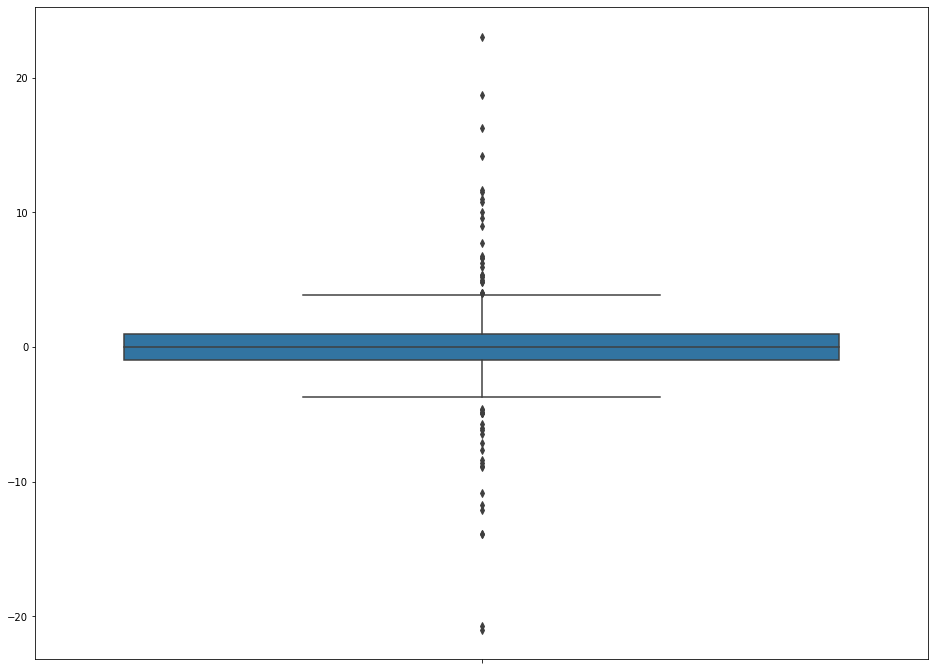

In [14]:
plt.figure(figsize=(16,12))
sns.boxplot(countries[['Net_migration']], orient="vertical")

In [15]:
quant1 = countries['Net_migration'].quantile(0.25)
quant3 = countries['Net_migration'].quantile(0.75)
iqr = quant3 - quant1

non_outlier_interval_iqr = [quant1 - 1.5 * iqr, quant3 + 1.5 * iqr]

In [16]:
np.sum(countries['Net_migration'] > non_outlier_interval_iqr[1])

26

In [17]:
np.sum(countries['Net_migration'] < non_outlier_interval_iqr[0])

24

In [18]:
def q5():
    # Retorne aqui o resultado da questão 4.
    quant1 = countries['Net_migration'].quantile(0.25)
    quant3 = countries['Net_migration'].quantile(0.75)
    iqr = quant3 - quant1

    non_outlier_interval_iqr = [quant1 - 1.5 * iqr, quant3 + 1.5 * iqr]
    acima = int(np.sum(countries['Net_migration'] > non_outlier_interval_iqr[1]))
    abaixo = int(np.sum(countries['Net_migration'] < non_outlier_interval_iqr[0]))
    return (abaixo, acima, False)

In [19]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [190]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, 
                               shuffle=True, random_state=42)

In [192]:
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)

In [201]:
words_idx = count_vectorizer.vocabulary_.get(f"phone")

In [218]:
pd.DataFrame(newsgroups_counts[:, words_idx].toarray(),
             columns=[count_vectorizer.get_feature_names()[words_idx]]).sum().loc['phone']

213

In [219]:
count_vectorizer.get_feature_names()[words_idx]

'phone'

In [214]:
def q6():
    # Retorne aqui o resultado da questão 4.
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)
    words_idx = count_vectorizer.vocabulary_.get(f"phone")
    return int(pd.DataFrame(newsgroups_counts[:, words_idx].toarray(),
             columns=["phone"]).sum().loc['phone'])

In [215]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [222]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(newsgroup.data)

newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)

In [227]:
pd.DataFrame(newsgroups_tfidf_vectorized[:, words_idx].toarray(), 
             columns=[count_vectorizer.get_feature_names()[words_idx]]).sum().round(3)

phone    8.888
dtype: float64

In [232]:
def q7():
    # Retorne aqui o resultado da questão 7.
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(newsgroup.data)
    newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)
    return float(pd.DataFrame(newsgroups_tfidf_vectorized[:, words_idx].toarray(), 
                     columns=[count_vectorizer.get_feature_names()[words_idx]]).sum().round(3))

In [233]:
q7()

8.888